# SQL 작업 후 시행하는 코드입니다. (code after sql query)
## SQL작업 데이터 호출, 전처리 후 저장
## Data load from SQL works and export file from pandas

In [8]:
# 패키지 설치
!pip install cx_Oracle

In [9]:
import pandas as pd
import cx_Oracle as oci  # python 3.4기준으로 data import하는 방법

#C:\oraclexe\app\oracle\product\11.2.0\server\network\ADMIN 에 가서 tnsname.ora에 port값(1521), service name(xe) 조회
# user와 pw변수는 각자 맞는 정보로 고쳐서 실행
user = "DB"
pw = "1234"
dsn = "localhost:1521/xe" 


# 연결
con = oci.connect(user=user, password=pw, dsn=dsn)

# 커서
cur = con.cursor()


query = 'select * from FD'
df = pd.read_sql_query(query, con)
df

C:\Users\embed\AppData\Local\Temp\ipykernel_6728\1813502195.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


,TRANS_NUM,CC_NUM,CATEGORY,AMT,GENDER,CITY,STATE,CITY_POP,JOB,IS_FRAUD,AGE,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,TRANS_DAY_SIMPLIFIED,IS_COVID_YEAR
0,0b242abb623afc578575680df30655b9,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,3495,"Psychologist, counselling",0,35,2019,1,1,0,0,0,0
1,1f76529f8574734946361c461b024d99,630423337322,grocery_pos,107.23,F,Orient,WA,149,Special educational needs teacher,0,45,2019,1,1,0,0,0,0
2,a1a22d70485983eac12b5b88dad1cf95,38859492057661,entertainment,220.11,M,Malad City,ID,4154,Nature conservation officer,0,61,2019,1,1,0,0,0,0
3,6b849c168bdad6f867558c3793159a81,3534093764340240,gas_transport,45.00,M,Boulder,MT,1939,Patent attorney,0,56,2019,1,1,0,0,0,0
4,a41d7549acf90789359a9aa5346dcb46,375534208663984,misc_pos,41.96,M,Doe Hill,VA,99,Dance movement psychotherapist,0,37,2019,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,9b1f753c79894c9f4b71f04581835ada,30560609640617,health_fitness,43.77,M,Luray,MO,519,Town planner,0,57,2020,12,31,23,3,2,1
1852390,2090647dac2c89a1d86c514c427f5b91,3556613125071656,kids_pets,111.84,M,Lake Jackson,TX,28739,Futures trader,0,23,2020,12,31,23,3,2,1
1852391,6c5b7c8add471975aa0fec023b2e8408,6011724471098086,kids_pets,86.88,F,Burbank,WA,3684,Musician,0,41,2020,12,31,23,3,2,1
1852392,14392d723bb7737606b2700ac791b7aa,4079773899158,travel,7.99,M,Mesa,ID,129,Cartographer,0,57,2020,12,31,23,3,2,1


In [10]:
df.info()   # 기본 정보 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   TRANS_NUM              object 
 1   CC_NUM                 object 
 2   CATEGORY               object 
 3   AMT                    float64
 4   GENDER                 object 
 5   CITY                   object 
 6   STATE                  object 
 7   CITY_POP               int64  
 8   JOB                    object 
 9   IS_FRAUD               int64  
 10  AGE                    int64  
 11  TRANS_YEAR             int64  
 12  TRANS_MONTH            int64  
 13  TRANS_DAY              int64  
 14  TRANS_HOUR             int64  
 15  TRANS_HOUR_SIMPLIFIED  int64  
 16  TRANS_DAY_SIMPLIFIED   int64  
 17  IS_COVID_YEAR          int64  
dtypes: float64(1), int64(10), object(7)
memory usage: 254.4+ MB


In [11]:
df["CATEGORY"].value_counts() # 카테고리 파악

gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: CATEGORY, dtype: int64

In [12]:
# category, gender, state에 대한 numeric labeling 함수
def column_labeling(DF, col_name):
    count = 0
    label_dict = {}
    column_list = []
    
    for i in DF[col_name]:
        if i in label_dict.keys():
            column_list.append(label_dict[i])
        else:
            label_dict[i] = count;
            count = count + 1
            column_list.append(label_dict[i])
            
    save_dict = pd.DataFrame()
    save_dict["string"] = label_dict.keys()
    save_dict["integer"] = label_dict.values()
    save_dict.to_csv("data/"+col_name+"_label.csv", index=False)
    
    DF[col_name] = column_list
    return DF

df = column_labeling(df, "CATEGORY")
df = column_labeling(df, "GENDER")
df = column_labeling(df, "STATE")
df.head(10)

,TRANS_NUM,CC_NUM,CATEGORY,AMT,GENDER,CITY,STATE,CITY_POP,JOB,IS_FRAUD,AGE,TRANS_YEAR,TRANS_MONTH,TRANS_DAY,TRANS_HOUR,TRANS_HOUR_SIMPLIFIED,TRANS_DAY_SIMPLIFIED,IS_COVID_YEAR
0,0b242abb623afc578575680df30655b9,2703186189652095,0,4.97,0,Moravian Falls,0,3495,"Psychologist, counselling",0,35,2019,1,1,0,0,0,0
1,1f76529f8574734946361c461b024d99,630423337322,1,107.23,0,Orient,1,149,Special educational needs teacher,0,45,2019,1,1,0,0,0,0
2,a1a22d70485983eac12b5b88dad1cf95,38859492057661,2,220.11,1,Malad City,2,4154,Nature conservation officer,0,61,2019,1,1,0,0,0,0
3,6b849c168bdad6f867558c3793159a81,3534093764340240,3,45.00,1,Boulder,3,1939,Patent attorney,0,56,2019,1,1,0,0,0,0
4,a41d7549acf90789359a9aa5346dcb46,375534208663984,4,41.96,1,Doe Hill,4,99,Dance movement psychotherapist,0,37,2019,1,1,0,0,0,0
5,189a841a0a8ba03058526bcfe566aab5,4767265376804500,3,94.63,0,Dublin,5,2158,Transport planner,0,62,2019,1,1,0,0,0,0
6,83ec1cc84142af6e2acf10c44949e720,30074693890476,5,44.54,0,Holcomb,6,2691,Arboriculturist,0,30,2019,1,1,0,0,0,0
7,6d294ed2cc447d2c71c7171a3d54967c,6011360759745864,3,71.65,1,Edinburg,4,6018,"Designer, multimedia",0,76,2019,1,1,0,0,0,0
8,fc28024ce480f8ef21a32d64c93a29f5,4922710831011201,4,4.27,0,Manor,5,1472,Public affairs consultant,0,82,2019,1,1,0,0,0,0
9,3b9014ea8fb80bd65de0b1463b00b00e,2720830304681674,1,198.39,0,Clarksville,7,151785,Pathologist,0,49,2019,1,1,0,0,0,0


### New  Labeled Columns Index

__CATEGORY:__ 0 = misc_net, 1 = grocery_pos, 2 = entertainment, 3 = gas_transport  
4 = misc_pos, 5 = grocery_net, 6 = shooping_net, 7 = shopping_pos, 8 = food_dining  
9 = personal_care, 10 = health_fitness, 11 = travel, 12= kids_pets, 13 = home  

* POS = point of sale, local payment where net refers to 'online' payment

__GENDER:__ 0 = W, 1 = M  

__STATE:__ NC 0
,WA 1
,ID 2
,MT 3
,VA 4
,PA 5
,KS 6
,TN 7
,IA 8
,WV 9
,FL 10
,CA 11
,NM 12
,NJ 13
,OK 14
,IN 15
,MA 16
,TX 17
,WI 18
,MI 19
,WY 20
,HI 21
,NE 22
,OR 23
,LA 24
,DC 25
,KY 26
,NY 27
,MS 28
,UT 29
,AL 30
,AR 31
,MD 32
,GA 33
,ME 34
,AZ 35
,MN 36
,OH 37
,CO 38
,VT 39
,MO 40
,SC 41
,NV 42
,IL 43
,NH 44
,SD 45
,AK 46
,ND 47
,CT 48
,RI 49
,DE 50

In [13]:
df = df.drop(columns='TRANS_NUM')  # remove index
# 컬럼 순서 병경
df = df[['TRANS_YEAR','IS_COVID_YEAR', 'TRANS_MONTH','TRANS_DAY','TRANS_DAY_SIMPLIFIED','TRANS_HOUR','TRANS_HOUR_SIMPLIFIED','CATEGORY','AMT','GENDER','CITY','CITY_POP','STATE','JOB','AGE','IS_FRAUD', 'CC_NUM']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   TRANS_YEAR             int64  
 1   IS_COVID_YEAR          int64  
 2   TRANS_MONTH            int64  
 3   TRANS_DAY              int64  
 4   TRANS_DAY_SIMPLIFIED   int64  
 5   TRANS_HOUR             int64  
 6   TRANS_HOUR_SIMPLIFIED  int64  
 7   CATEGORY               int64  
 8   AMT                    float64
 9   GENDER                 int64  
 10  CITY                   object 
 11  CITY_POP               int64  
 12  STATE                  int64  
 13  JOB                    object 
 14  AGE                    int64  
 15  IS_FRAUD               int64  
 16  CC_NUM                 object 
dtypes: float64(1), int64(13), object(3)
memory usage: 240.3+ MB


In [14]:
# category type = data has reptitive string pattern
# set binary data as bool
df['GENDER'] = df['GENDER'].astype('bool')
df['IS_COVID_YEAR'] = df['IS_COVID_YEAR'].astype('bool')
df['IS_FRAUD'] = df['IS_FRAUD'].astype('bool')


df.info() # check data Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   TRANS_YEAR             int64  
 1   IS_COVID_YEAR          bool   
 2   TRANS_MONTH            int64  
 3   TRANS_DAY              int64  
 4   TRANS_DAY_SIMPLIFIED   int64  
 5   TRANS_HOUR             int64  
 6   TRANS_HOUR_SIMPLIFIED  int64  
 7   CATEGORY               int64  
 8   AMT                    float64
 9   GENDER                 bool   
 10  CITY                   object 
 11  CITY_POP               int64  
 12  STATE                  int64  
 13  JOB                    object 
 14  AGE                    int64  
 15  IS_FRAUD               bool   
 16  CC_NUM                 object 
dtypes: bool(3), float64(1), int64(10), object(3)
memory usage: 203.2+ MB


In [15]:
# statistics for numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANS_YEAR,1852394.0,2019.500727,0.500000,2019.0,2019.00,2020.00,2020.0,2020.0
TRANS_MONTH,1852394.0,7.152067,3.424954,1.0,4.00,7.00,10.0,12.0
TRANS_DAY,1852394.0,15.850756,8.876245,1.0,8.00,16.00,24.0,31.0
TRANS_DAY_SIMPLIFIED,1852394.0,1.024302,0.823324,0.0,0.00,1.00,2.0,2.0
TRANS_HOUR,1852394.0,12.806119,6.815753,0.0,7.00,14.00,19.0,23.0
TRANS_HOUR_SIMPLIFIED,1852394.0,1.583430,1.100054,0.0,1.00,2.00,3.0,3.0
CATEGORY,1852394.0,6.527952,4.104133,0.0,3.00,7.00,10.0,13.0
AMT,1852394.0,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9
CITY_POP,1852394.0,88643.674509,301487.618344,23.0,741.00,2443.00,20328.0,2906700.0
STATE,1852394.0,21.881341,12.984452,0.0,11.00,20.00,32.0,50.0


### 데이터 이상유무
TRANS_YEAR: 2019, 2020만 있는 데이터임 보임 (이상 無)    
TRANS_MONTH: 1월부터 12월까지 있는 데이터임을 보임 (이상 無)    
TRANS_DAY: 1일부터 31일까지 있는 데이터임을 보임 (이상 無)    
TRANS_DAY_SIMPLIFIED: 데이터 이상 無  
TRANS_HOUR: 0(=24)시부터 23시까지의 데이터를 보임 (이상 無)  
TRANS_HOUR_SIMPLIFIED: 데이터 이상 無  
CATEGORY:Shooping비중이 온오프라인 통틀어 높다.  
AMT: 거래한 금액, 이상치여부 진단 필요  
CITY_POP: 카드 소지자의 거주도시 전체 인구, 이상치여부 진단 필요  
STATE: 미국 51개 주에 대한 정보  
AGE: 18세부터 98세까지의 연령의 데이터를 보임, 이상치여부 진단 필요  

In [16]:
df.describe(include='all').T  # 문자열 정보를 포함한 경우

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TRANS_YEAR,1852394.0,NaN,NaN,NaN,2019.500727,0.5,2019.0,2019.0,2020.0,2020.0,2020.0
IS_COVID_YEAR,1852394,2,True,927544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRANS_MONTH,1852394.0,NaN,NaN,NaN,7.152067,3.424954,1.0,4.0,7.0,10.0,12.0
TRANS_DAY,1852394.0,NaN,NaN,NaN,15.850756,8.876245,1.0,8.0,16.0,24.0,31.0
TRANS_DAY_SIMPLIFIED,1852394.0,NaN,NaN,NaN,1.024302,0.823324,0.0,0.0,1.0,2.0,2.0
TRANS_HOUR,1852394.0,NaN,NaN,NaN,12.806119,6.815753,0.0,7.0,14.0,19.0,23.0
TRANS_HOUR_SIMPLIFIED,1852394.0,NaN,NaN,NaN,1.58343,1.100054,0.0,1.0,2.0,3.0,3.0
CATEGORY,1852394.0,NaN,NaN,NaN,6.527952,4.104133,0.0,3.0,7.0,10.0,13.0
AMT,1852394.0,NaN,NaN,NaN,70.063567,159.253975,1.0,9.64,47.45,83.1,28948.9
GENDER,1852394,2,False,1014749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 데이터 이상유무 (numeric data 제외)
IS_COVID_YEAR: 데이터 이상 無  
GENDER: 데이터 이상 無
CITY: 데이터 이상 無   
JOB: 데이터 이상 無  
IS_FRAUD: FRAUD가 아닌 경우가 전체 1604294에서 1596143개인 데이터 불균형 문제 있음   
CC_NUM: 이 데이터는 1860명의 카드 소비에 대해서 다루고 있다.  
  
  
다음은 AMT, CITY_POP, AGE, STATE에 대한 데이터 치우침의 여부를 파악한다.

## AMT

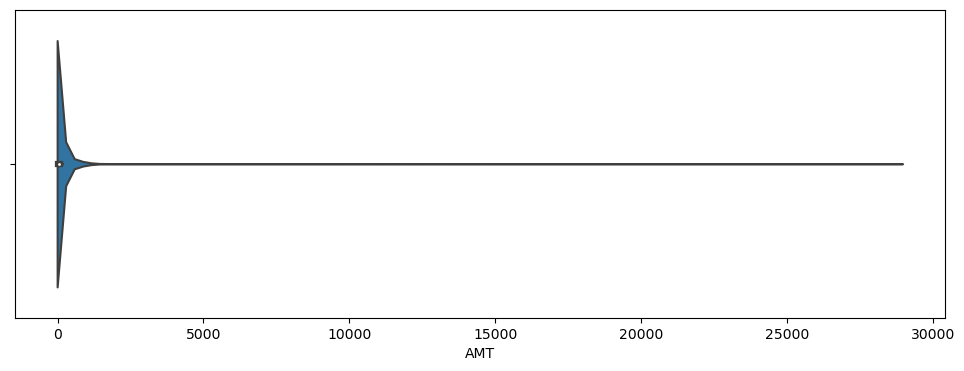

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# boxplot내부 분포도 같이 확인하기위해 violinplot을 사용한다.
plt.figure(figsize=(12,4))
sns.violinplot(x= 'AMT', data=df)
plt.show()

AMT컬럼의 데이터 양상은 0에서 약 8000사이의 값이 대부분이다.  
boxplot기준 대부분의 데이터가 이상치로 잡히므로 데이터 조정이 필요하다. 

* Note that all outlier causes in this data are merely natrual outlier. (자연발생)

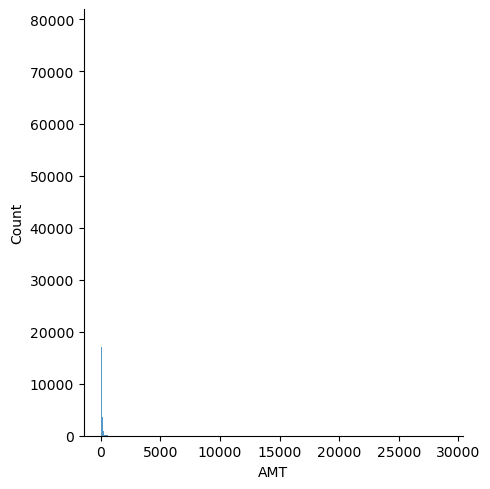

Skewness: 40.812809
Kurtosis: 4181.907344


In [18]:
sns.displot(df['AMT'])
plt.show()
print("Skewness: %f" % df['AMT'].skew())
print("Kurtosis: %f" % df['AMT'].kurt())

* Note that count implies frequency. (빈도)  

이를 뒷받침하듯 skewness가 40이상이다. 또한 kurtosis값이 4090으로 표준 정규분포보다 매우 뾰족하며, 데이터가 한 곳에 집중된 정도가 극단적이다.  
 → 이러한 극단성을 효과적으로 완화하기위해 natrual log기법을 사용한다.

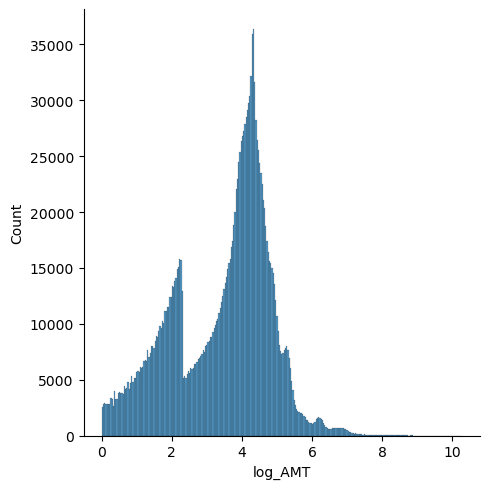

Skewness: -0.452045
Kurtosis: -0.394496


In [19]:
import numpy as np
# AMT 컬럼에 자연로그를 씌우고 양상을 확인한다.
df['log_AMT'] = np.log(df['AMT'])
sns.displot(df['log_AMT'])
plt.show()
print("Skewness: %f" % df['log_AMT'].skew())
print("Kurtosis: %f" % df['log_AMT'].kurt())

[Skewness] < 0.5 이므로 비교적 대칭적이라 판단할 수 있다.  
Kurtosis < 0 이므로, 정규분포보다 완만한 형태라 판단할 수 있다.  

 → 결과적으로 이전보다 Skewness와 kurtosis의 극단성이 해결되었다.

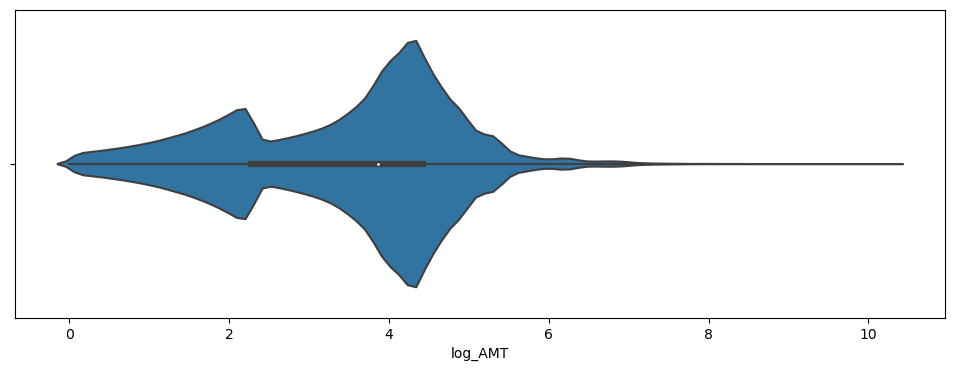

In [20]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'log_AMT', data=df)
plt.show()

violinplot에서도 이전보다 outlier가 줄어든 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.  

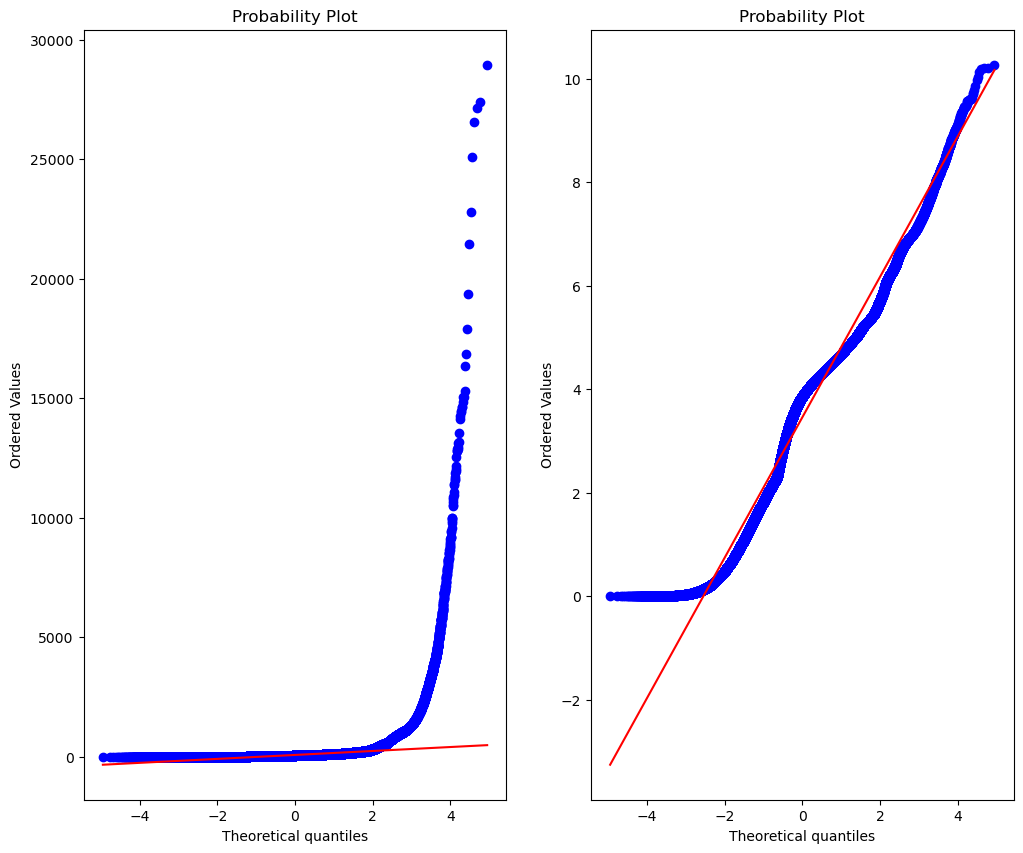

In [21]:
from scipy import stats

fig = plt.figure(figsize = (12,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df['AMT'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['log_AMT'], plot=plt)

기존 원본데이터에 비해서 log_AMT가 정규분포에 근사하게 변하였음을 알 수 있다.  
그렇다면 log_AMT가 정규분포 외에 다른 분포와 유사성이 없는지를 점검한다.

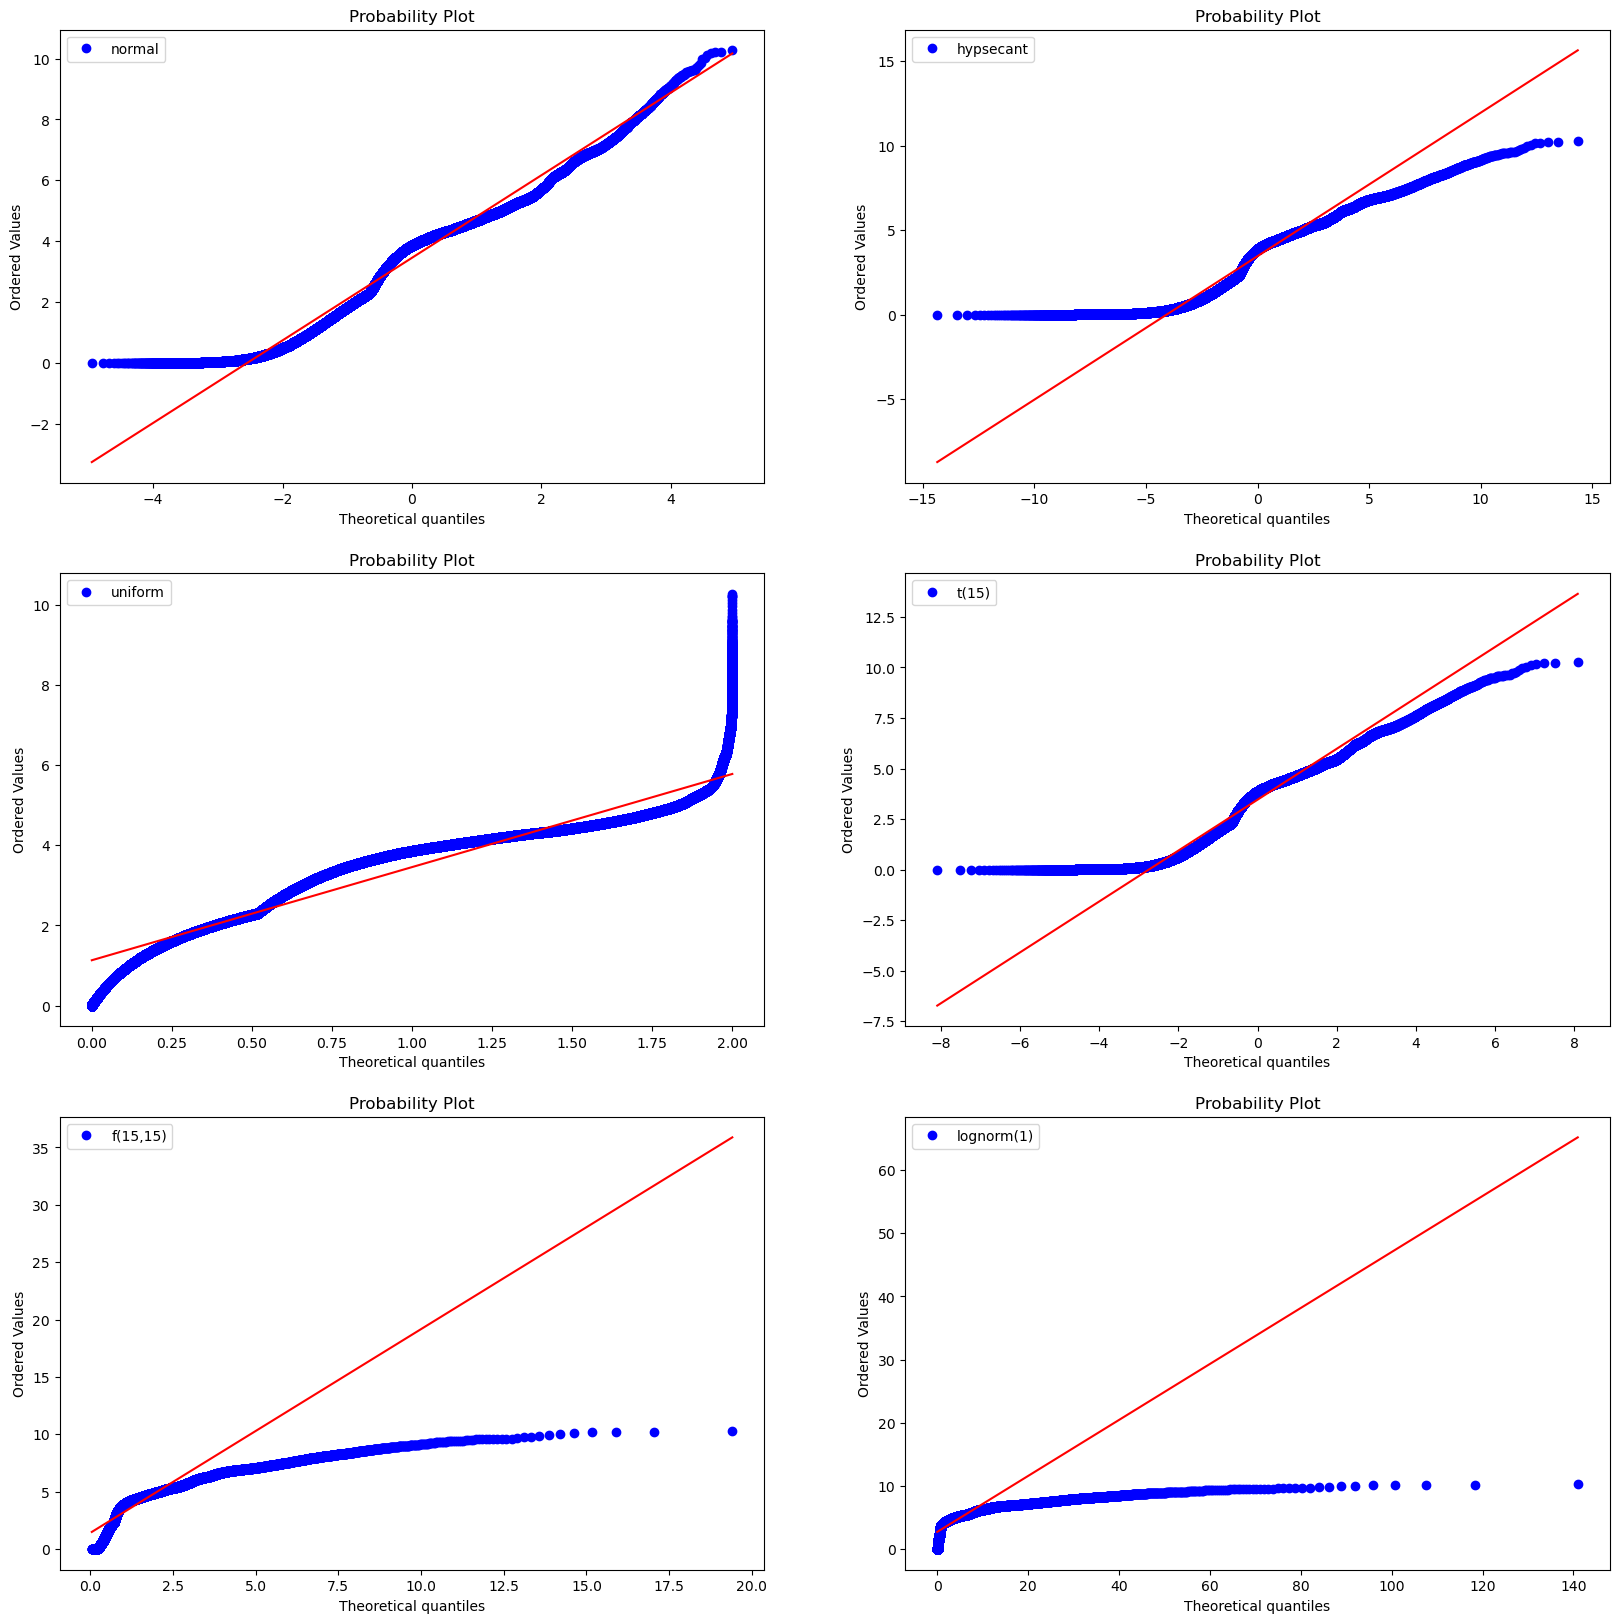

In [22]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

stats.probplot(df['log_AMT'], dist=stats.norm, plot=ax1)
ax1.legend(['normal'])
stats.probplot(df['log_AMT'], dist=stats.hypsecant, plot=ax2)
ax2.legend(['hypsecant'])
stats.probplot(df['log_AMT'], dist=stats.uniform(0,2), plot=ax3)
ax3.legend(['uniform'])
stats.probplot(df['log_AMT'], dist=stats.t(15), plot=ax4)
ax4.legend(['t(15)'])
stats.probplot(df['log_AMT'], dist=stats.f(15,15), plot=ax5)
ax5.legend(['f(15,15)'])
stats.probplot(df['log_AMT'], dist=stats.lognorm(1), plot=ax6)
ax6.legend(['lognorm(1)'])

plt.show()

→ None of distributions fits to AMT compared to the normal distribution  
쌍곡선할선, 균등, 자유도 15의 t와 f, lognorm 그래프와 첫 정규분포그래프를 비교할 때, 빨간선에 비교적 일치하면서, 극단값의 가능성이 제일 적은 것은 정규분포 모양이라고 판단할 수 있다.


## CITY_POP

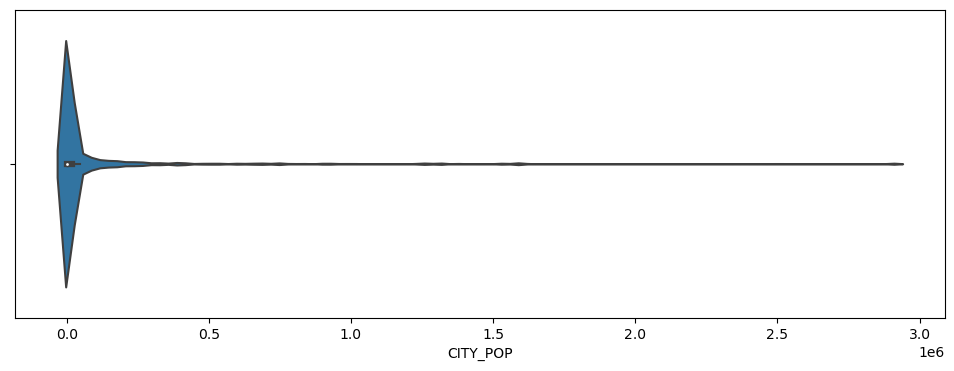

In [23]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'CITY_POP', data=df)
plt.show()

CITY_POP도 AMT와 같이 대부분의 데이터가 이상치로 잡히므로 데이터 조정이 필요하다.

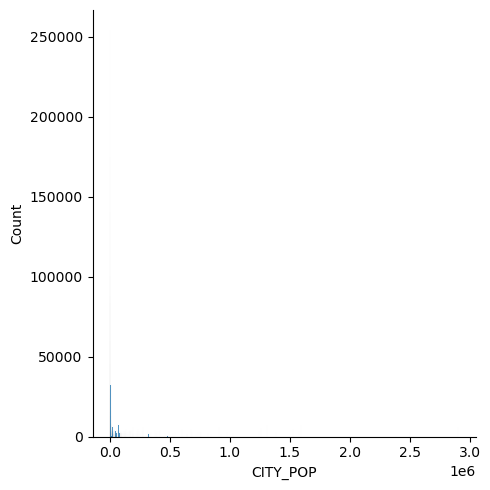

Skewness: 5.590805
Kurtosis: 37.572846


In [24]:
sns.displot(df['CITY_POP'])
plt.show()
print("Skewness: %f" % df['CITY_POP'].skew())
print("Kurtosis: %f" % df['CITY_POP'].kurt())

skewness와 kurtosis는 AMT보다 극단성 수치는 적지만, 그래프상 극단성을 보이고 있다.  
→ 이러한 극단성을 효과적으로 완화하기위해 AMT와 같이 natrual log기법을 사용한다.

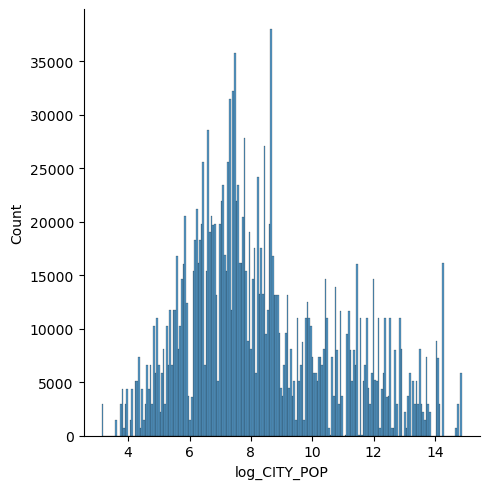

Skewness: 0.605150
Kurtosis: -0.297310


In [25]:
# CITY_POP 컬럼에 자연로그를 씌우고 양상을 확인한다.
df['log_CITY_POP'] = np.log(df['CITY_POP'])
sns.displot(df['log_CITY_POP'])
plt.show()
print("Skewness: %f" % df['log_CITY_POP'].skew())
print("Kurtosis: %f" % df['log_CITY_POP'].kurt())

0.5 <[Skewness] < 1 이므로 극단성은 해소한 moderately skewed 상태가 되었다.  
Kurtosis < 0 이므로, 정규분포보다 완만한 형태라 판단할 수 있다.  

→ 결과적으로 이전보다 Skewness와 kurtosis의 극단성이 해결되었다.

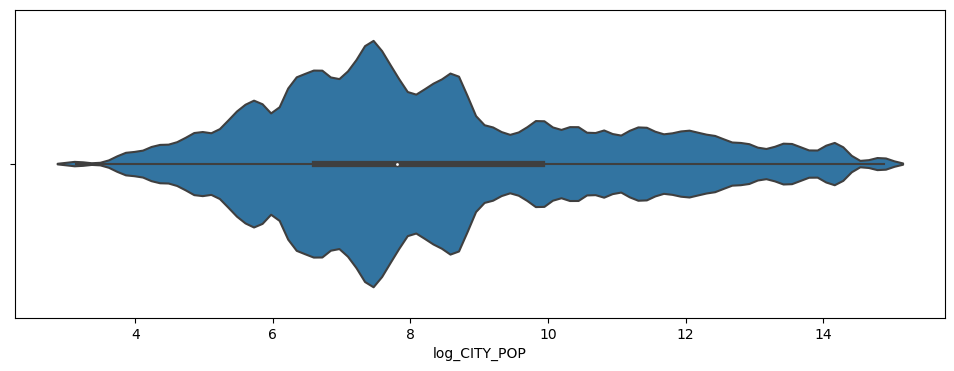

In [26]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'log_CITY_POP', data=df)
plt.show()

violinplot에서도 이전보다 outlier가 줄어든 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.

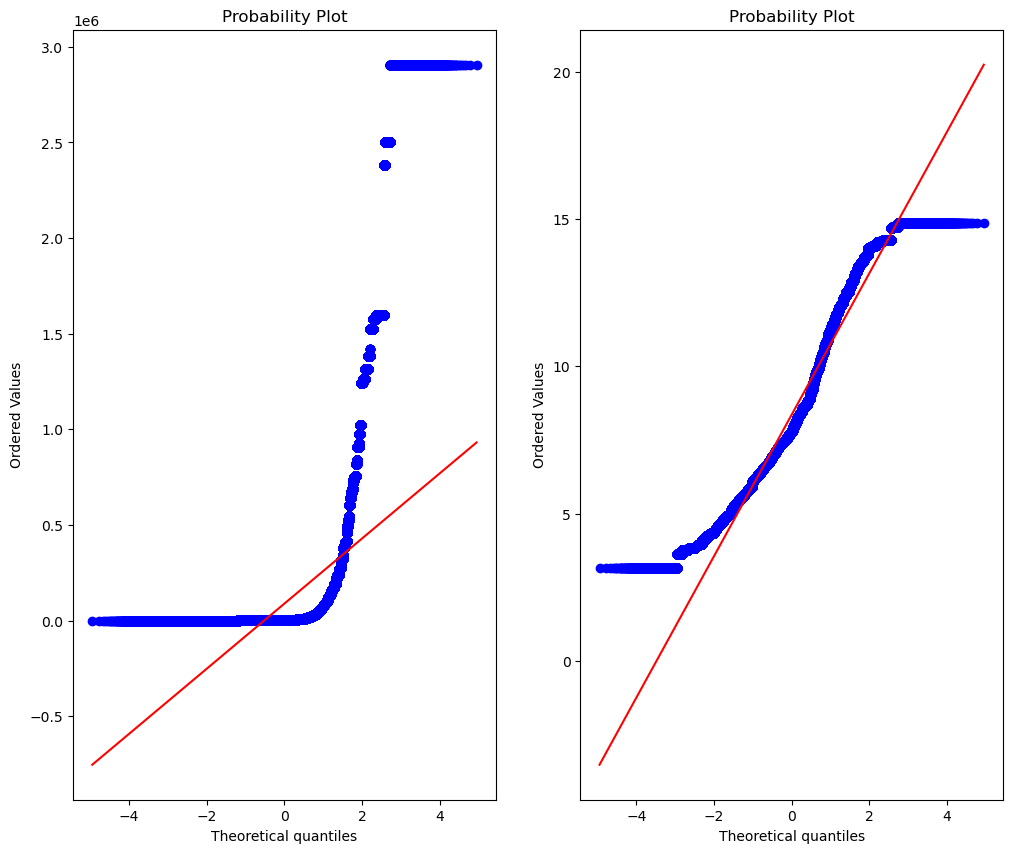

In [27]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df['CITY_POP'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

전보다 정규분포와 가까워졌으나 정규분포라고 단정짓기엔 어려운 상황이다.

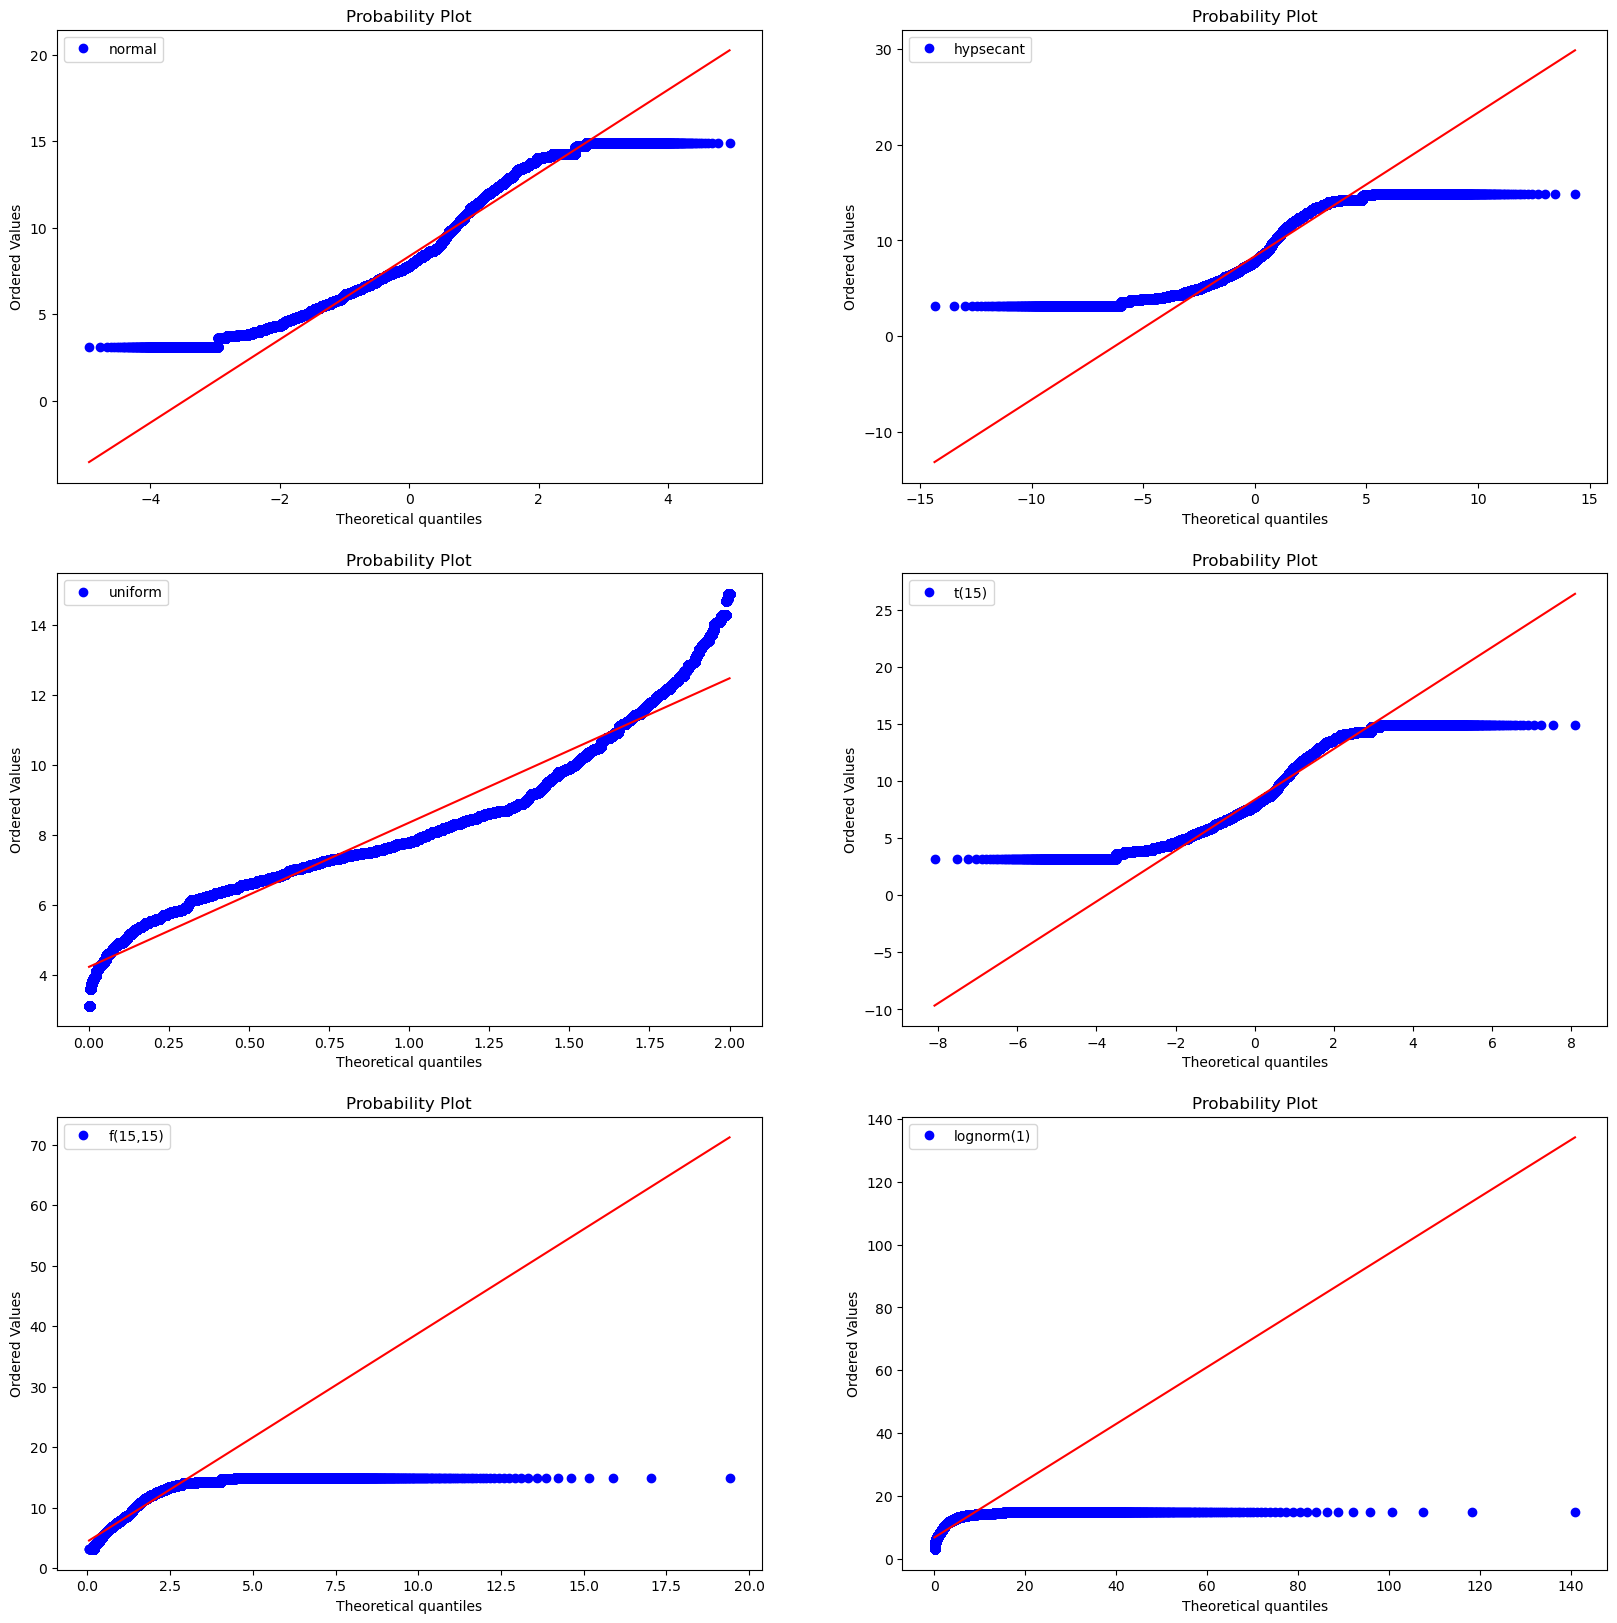

In [28]:
fig = plt.figure(figsize = (20,20))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)

stats.probplot(df['log_CITY_POP'], dist=stats.norm, plot=ax1)
ax1.legend(['normal'])
stats.probplot(df['log_CITY_POP'], dist=stats.hypsecant, plot=ax2)
ax2.legend(['hypsecant'])
stats.probplot(df['log_CITY_POP'], dist=stats.uniform(0,2), plot=ax3)
ax3.legend(['uniform'])
stats.probplot(df['log_CITY_POP'], dist=stats.t(15), plot=ax4)
ax4.legend(['t(15)'])
stats.probplot(df['log_CITY_POP'], dist=stats.f(15,15), plot=ax5)
ax5.legend(['f(15,15)'])
stats.probplot(df['log_CITY_POP'], dist=stats.lognorm(1), plot=ax6)
ax6.legend(['lognorm(1)'])

plt.show()

어느 분포와도 유사성을 보이지 않고있다. 이는 log tranformation 해당 데이터를 정규화하는데 충분치 않았음을 의미한다. 그래서 단순하게 여기서 log를 한 번 더 적용하는 이중로그를 수행한다.

## CITY_POP(double log)

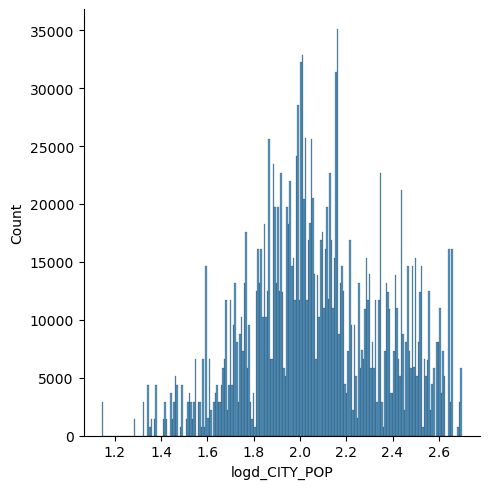

Skewness: -0.035901
Kurtosis: -0.351169


In [29]:
# CITY_POP 컬럼에 이중으로 자연로그를 씌우고 양상을 확인한다.
df['logd_CITY_POP'] = np.log(np.log(df['CITY_POP']))
sns.displot(df['logd_CITY_POP'])
plt.show()
print("Skewness: %f" % df['logd_CITY_POP'].skew())
print("Kurtosis: %f" % df['logd_CITY_POP'].kurt())

[Skewness] < 0.5 이므로 이중로그가 비교적 대칭적이라 판단할 수 있다.  
Kurtosis < 0 인데 이전보다 절대값이 커진만큼 정규분포보다 완만한 형태를 띈다.

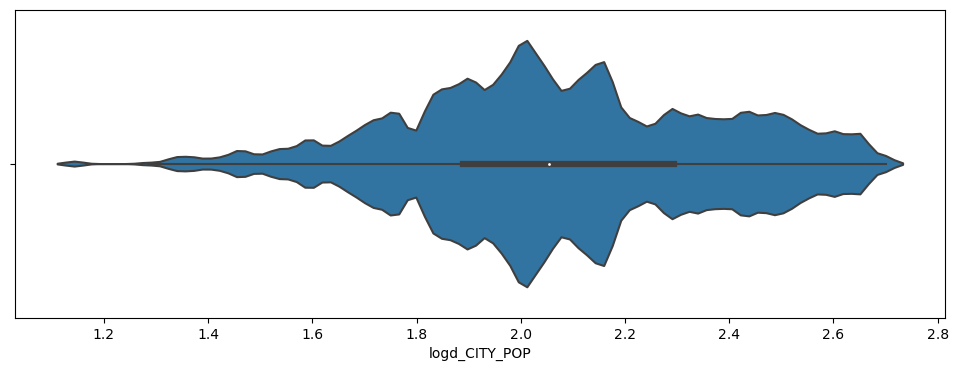

In [30]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'logd_CITY_POP', data=df)
plt.show()

violinplot은 이전보다 outlier 늘어난 양상을 보여주고있다.  
이를 QQ plot(Quantile-Quantile Plot)에서 정규성을 재점검한다.  

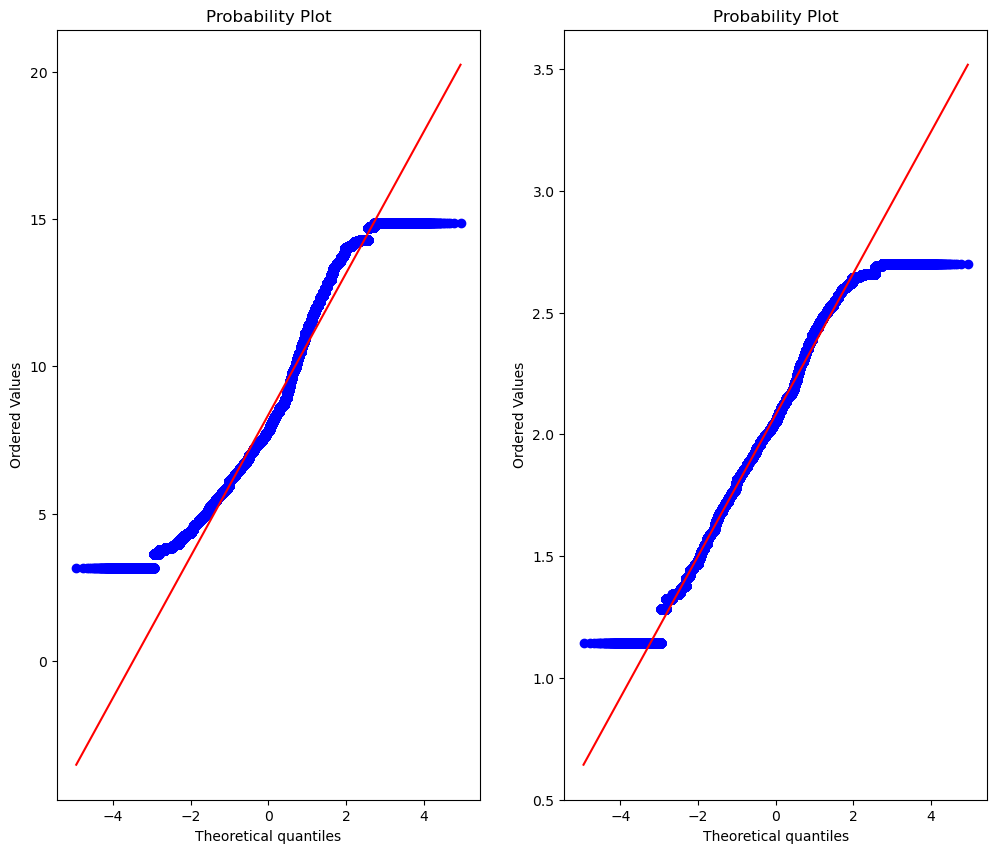

In [31]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(df['logd_CITY_POP'], plot=plt)

단순 로그와 이중로그의 결과를 비교해보면 나아지긴 하였으나 양쪽 극단의 부분이 여전히 문제가 되고있다. 여기서 이중로그로 인한 원본 데이터 왜곡을 최소화하는 대안으로 BOX-COX transformation을 시도해본다.

## CITY_POP(BOX COX)
Box-Cox transform as per Box, G. E. P. and Cox, D. R. (1964), "An Analysis of Transformations," Journal of the Royal Statistical Society, Series B, 26, 211--234.

box cox 기법은 다음과 같은 optimal lambda를 구하고 적용을 시작한다.

In [32]:
df['BC_CITY_POP'], lambda_optimal = stats.boxcox(df['CITY_POP'])
print('y =', df['BC_CITY_POP'])
print('optimal lambda =', lambda_optimal)

y = 0          5.391860
1          3.851125
2          5.461794
3          5.143118
4          3.609585
             ...   
1852389    4.524877
1852390    6.160727
1852391    5.413323
1852392    3.767202
1852393    6.580430
Name: BC_CITY_POP, Length: 1852394, dtype: float64
optimal lambda = -0.1096643435962921


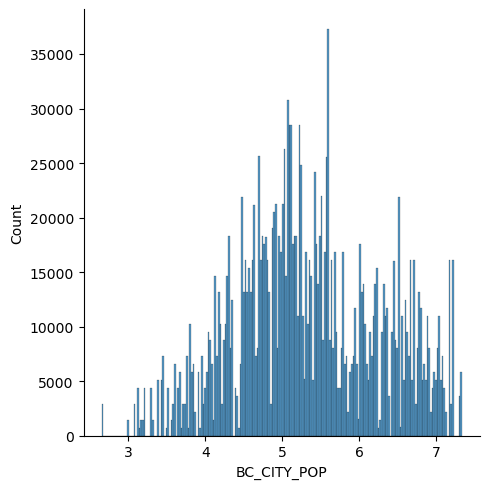

Skewness: 0.057546
Kurtosis: -0.529994


In [33]:
sns.displot(df['BC_CITY_POP'])
plt.show()
print("Skewness: %f" % df['BC_CITY_POP'].skew())
print("Kurtosis: %f" % df['BC_CITY_POP'].kurt())

skewness가 절대값 0.5 이하로 안정적인 상태로 변하였다.  
Kurtosis의 절대값은 기존 log방법보다 높아졌다. 

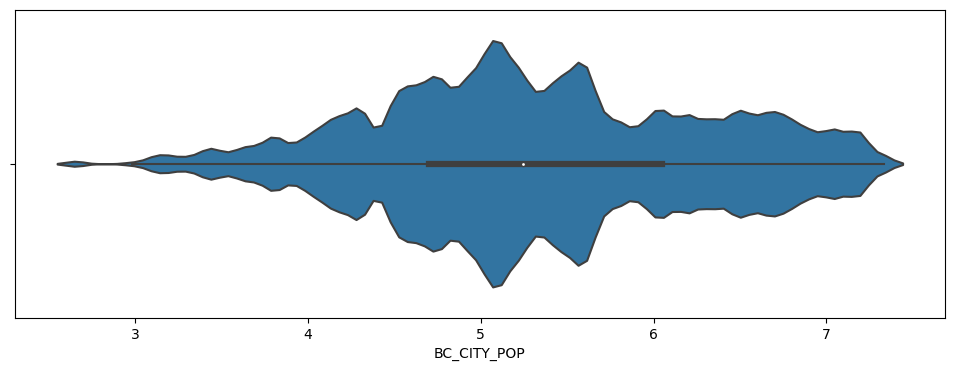

In [34]:
plt.figure(figsize=(12,4))
sns.violinplot(x= 'BC_CITY_POP', data=df)
plt.show()

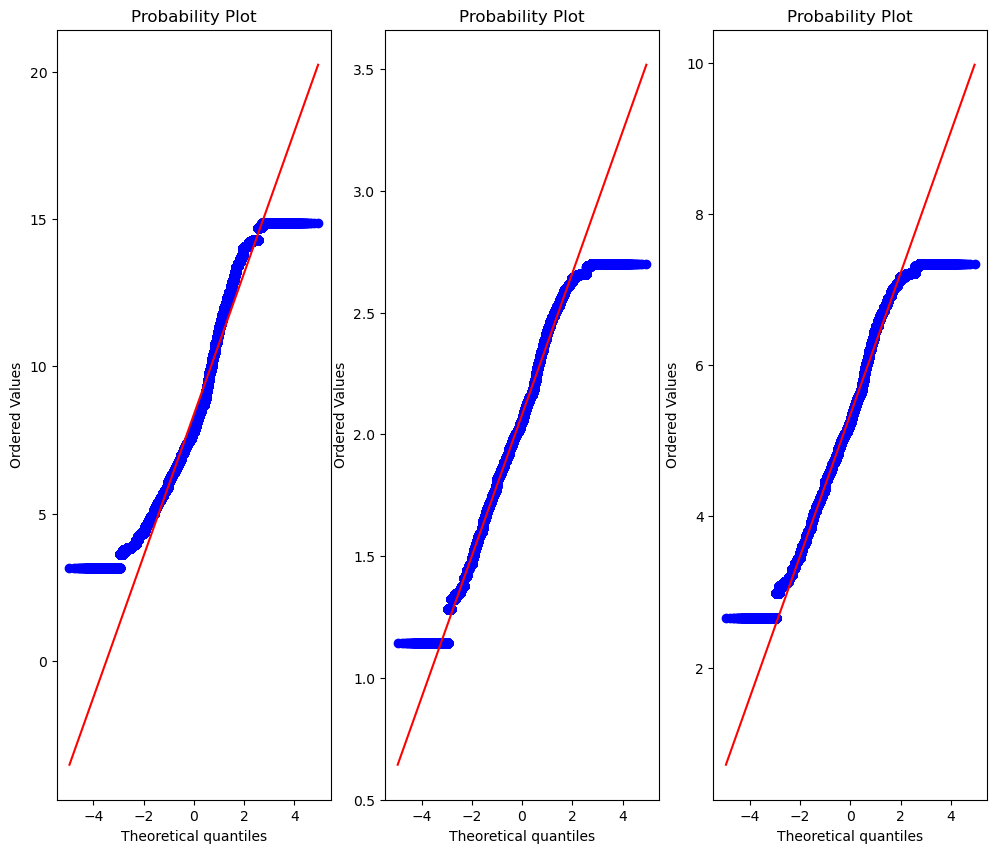

In [35]:
fig = plt.figure(figsize = (12,10))

fig.add_subplot(1,3,1)
res = stats.probplot(df['log_CITY_POP'], plot=plt)

fig.add_subplot(1,3,2)
res = stats.probplot(df['logd_CITY_POP'], plot=plt)

fig.add_subplot(1,3,3)
res = stats.probplot(df['BC_CITY_POP'], plot=plt)

violin graph와 qq plot의 양상이 이중로그의 경우와 매우 유사한 결과로 도출되었다.  
그러나 여전히 양쪽 극단 부분으로 인해 정규성에 가깝다고 결론내기 어려운 상태이다.  

이 경우, 한 번의 transformation만 거친 box-cox 방법을 선택한다.  
여기서 데이터 outlier 원인은 natrual cause이므로, 함부로 삭제하지않는다.  
  
추후 분석과정에서 정규화가 필요할 시에, outlier의 영향을 덜받는 sklearn의 Normalizer나 RobustScaler를 고려한다.

## AGE and STATE

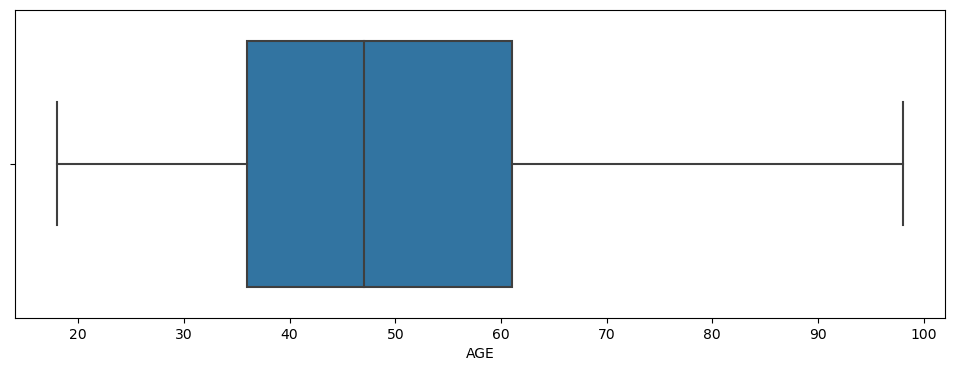

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(x= 'AGE', data=df)
plt.show()

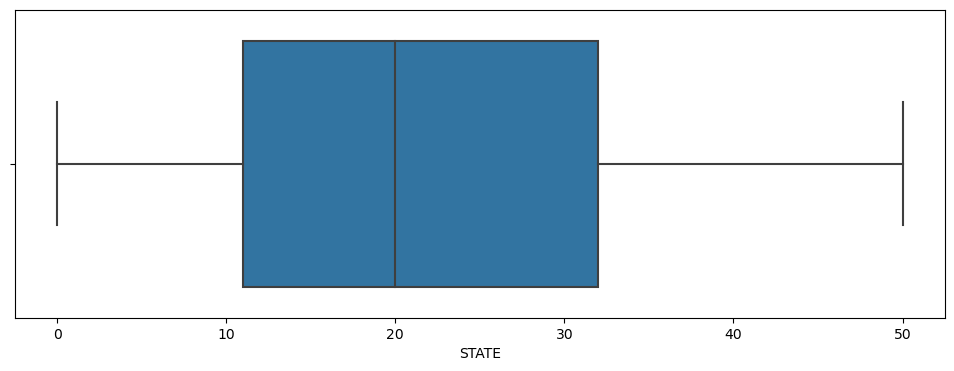

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(x= 'STATE', data=df)
plt.show()

그래프에 따르면 AGE와 STATE는 outlier없이 지정된 범위내에 있음을 알 수 있다.


## Correlation Analysis and Multicollinearity

C:\Users\embed\AppData\Local\Temp\ipykernel_6728\2745510748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


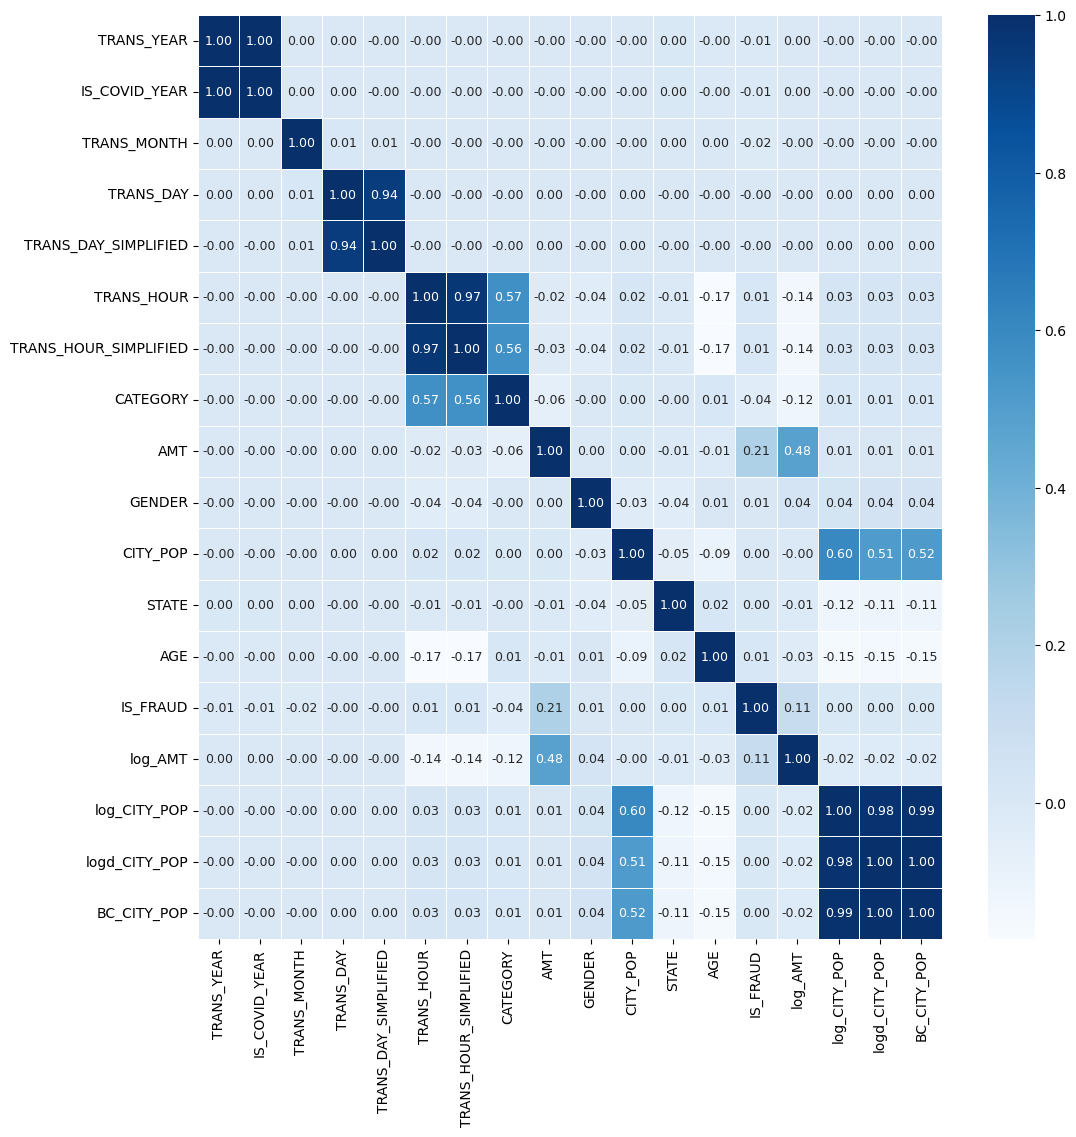

In [38]:
# define numeric data correlation
df_corr = df.corr()

# visualize correlation by heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, annot_kws = {"size" : 9}, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

* 모든 상관계수가 자기자신과, 변형 데이터(log, simplified)를 제외하면 0.6 이하이다.  
* Target인 IS_FRAUD의 상관계수가 대부분 낮게 나오는 이유는 unbalnced data 문제로 추정된다. 이는 추후 분석단계에서 다룬다.
* CATEGORY와 TRANS_HOUR 사이에 상관계수가 0.57로 높게 나오므로 이에 대한 Multicolinearity를 점검한다.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()
# VIF 출력을 위한 임의의 test data 형성 및 인덱스 제거
test = pd.DataFrame(df['CATEGORY'], df['TRANS_HOUR'])
test = test.reset_index()

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(test.values, i) for i in range(test.shape[1])]
vif["features"] = test.columns 

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,2.788033,CATEGORY
1,2.788033,TRANS_HOUR


VIF factor가 10이 넘지 않으므로 Multicolinearity가 없다고 판단할 수 있다.

In [40]:
df = df.drop(columns='log_CITY_POP')  # remove experimental columns
df = df.drop(columns='logd_CITY_POP')

# SQL 작업 + 지금까지의 분석 데이터 저장 (index 생성 방지 옵션 설정)
df.to_csv('data/Fraud_Detection_sql.csv', index=False) 

### 문제발견! (problem!)
to_csv는 변형된 dtype 전부 저장 불가 -> 필요에 따라 변환  
to_csv cannot save all changed dtypes -> need to apply when load python if necessary

In [41]:
# check the saved csv file
FD = pd.read_csv('data/Fraud_Detection_sql.csv')
FD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   TRANS_YEAR             int64  
 1   IS_COVID_YEAR          bool   
 2   TRANS_MONTH            int64  
 3   TRANS_DAY              int64  
 4   TRANS_DAY_SIMPLIFIED   int64  
 5   TRANS_HOUR             int64  
 6   TRANS_HOUR_SIMPLIFIED  int64  
 7   CATEGORY               int64  
 8   AMT                    float64
 9   GENDER                 bool   
 10  CITY                   object 
 11  CITY_POP               int64  
 12  STATE                  int64  
 13  JOB                    object 
 14  AGE                    int64  
 15  IS_FRAUD               bool   
 16  CC_NUM                 int64  
 17  log_AMT                float64
 18  BC_CITY_POP            float64
dtypes: bool(3), float64(3), int64(11), object(2)
memory usage: 231.4+ MB


In [42]:
FD.isnull().sum()  # check null

TRANS_YEAR               0
IS_COVID_YEAR            0
TRANS_MONTH              0
TRANS_DAY                0
TRANS_DAY_SIMPLIFIED     0
TRANS_HOUR               0
TRANS_HOUR_SIMPLIFIED    0
CATEGORY                 0
AMT                      0
GENDER                   0
CITY                     0
CITY_POP                 0
STATE                    0
JOB                      0
AGE                      0
IS_FRAUD                 0
CC_NUM                   0
log_AMT                  0
BC_CITY_POP              0
dtype: int64